In [1]:
import matplotlib.pyplot as plt
import numpy as np

import os, sys

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.cluster import KMeans

from parser import get_files_in_folder, parse_gene_sequences
from sklearn.svm import SVC

In [4]:
def one_hot_encode(sequence, sequence_length, n_features):
	encoding = np.zeros((sequence_length, n_features), dtype=int)
	for i, nucleotide in enumerate(sequence):
		if nucleotide == 'A':
			encoding[i, 0] = 1
		elif nucleotide == 'T':
			encoding[i, 1] = 1
		elif nucleotide == 'C':
			encoding[i, 2] = 1
		elif nucleotide == 'G':
			encoding[i, 3] = 1
	return encoding

In [5]:
# Load your genomic data
# Assuming you have a folder containing gene sequences in text format
folder_path = "E:\genes\TUBERCULOSE\Prokka7kFFN_FINAL"

print("Loading genomic data...")

# Get the paths to all files in the folder
files = get_files_in_folder(folder_path)

# Parse the gene sequences from each file
gene_sequences = []

for file_path in files[:5]:
	gene_sequences = parse_gene_sequences(file_path)
	
# Convert the gene sequences to a matrix of one-hot encoded vectors
# The matrix will have shape (n_sequences, sequence_length, n_features)
# where n_sequences is the number of gene sequences
sequence_length = max(len(seq) for seq in gene_sequences.values())
n_features = 4  # A, C, G, T
encoded_sequences = np.array([one_hot_encode(seq, sequence_length, n_features) for seq in gene_sequences.values()])

# Flatten the sequences for clustering
flattened_sequences = encoded_sequences.reshape(len(encoded_sequences), -1)

# Standardize the data
scaler = StandardScaler()
flattened_sequences = scaler.fit_transform(flattened_sequences)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(flattened_sequences)

Loading genomic data...


In [6]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(2,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='relu'))

print("Training neural network model...")

model.compile(optimizer=Adam(0.001), loss='mean_squared_error')
model.fit(pca_result, pca_result, epochs=100, batch_size=32)

Training neural network model...
Epoch 1/100
129/129 [==============================] - 0s 781us/step - loss: 4735.4170
Epoch 2/100
129/129 [==============================] - 0s 717us/step - loss: 4735.4199
Epoch 3/100
129/129 [==============================] - 0s 690us/step - loss: 4735.4199
Epoch 4/100
129/129 [==============================] - 0s 709us/step - loss: 4735.4175
Epoch 5/100
129/129 [==============================] - 0s 707us/step - loss: 4735.4189
Epoch 6/100
129/129 [==============================] - 0s 704us/step - loss: 4735.4175
Epoch 7/100
129/129 [==============================] - 0s 710us/step - loss: 4735.4160
Epoch 8/100
129/129 [==============================] - 0s 698us/step - loss: 4735.4185
Epoch 9/100
129/129 [==============================] - 0s 686us/step - loss: 4735.4185
Epoch 10/100
129/129 [==============================] - 0s 703us/step - loss: 4735.4180
Epoch 11/100
129/129 [==============================] - 0s 700us/step - loss: 4735.4189
Epoch 12

129/129 [==============================] - 0s 469us/step


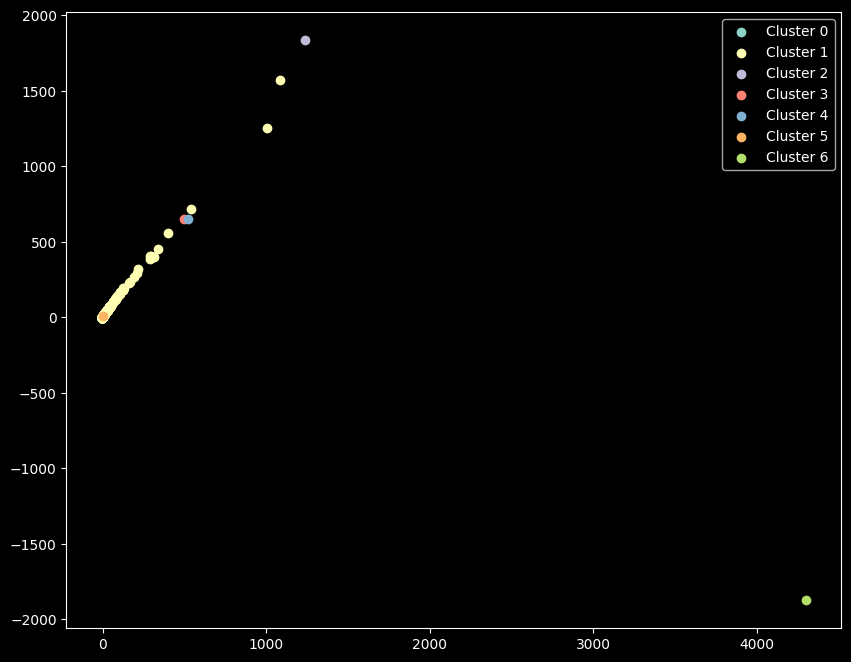

In [7]:
model.predict(pca_result)

# Apply KMeans clustering to the encoded sequences
kmeans = KMeans(n_clusters=7, random_state=42)
clusters = kmeans.fit_predict(flattened_sequences)


# Plot the PCA-reduced data with cluster assignments
plt.figure(figsize=(10, 8))

for cluster in np.unique(clusters):
	plt.scatter(pca_result[clusters == cluster, 0], pca_result[clusters == cluster, 1], label=f'Cluster {cluster}')

plt.legend()
plt.show()

In [8]:
# Get the encoded sequences from the last hidden layer
hidden_layer_model = Sequential()
hidden_layer_model.add(Dense(128, activation='relu', input_shape=(2,)))
hidden_layer_model.add(Dense(64, activation='relu'))
hidden_layer_model.add(Dense(32, activation='relu'))
hidden_layer_model.add(Dense(16, activation='relu'))
hidden_layer_model.add(Dense(8, activation='relu'))

hidden_layer_model.set_weights(model.get_weights()[:10])

encoded_sequences = hidden_layer_model.predict(pca_result)

129/129 [==============================] - 0s 523us/step


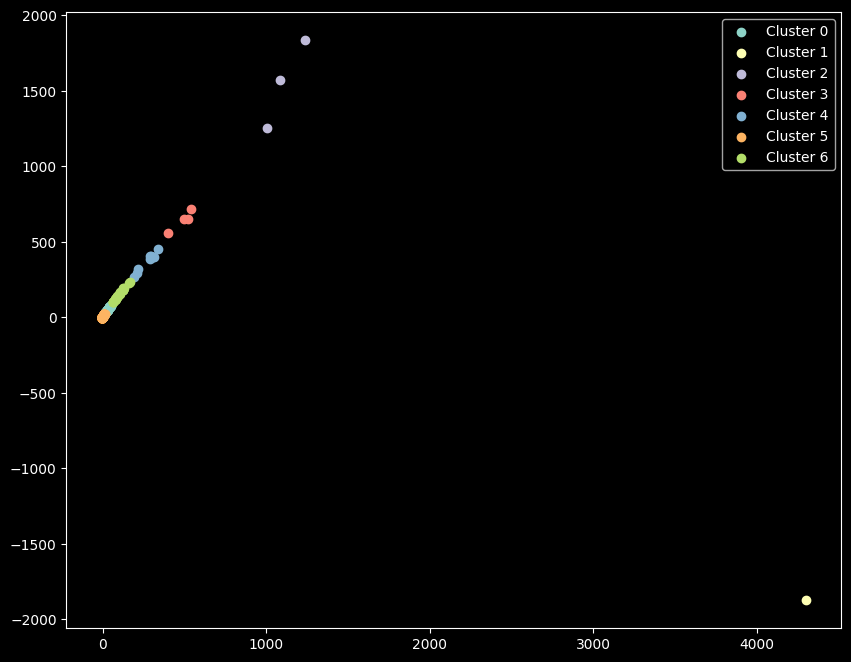

In [9]:
# Apply KMeans clustering to the encoded sequences
kmeans = KMeans(n_clusters=7, random_state=42)
clusters = kmeans.fit_predict(encoded_sequences)

# Plot the PCA-reduced data with cluster assignments
plt.figure(figsize=(10, 8))

for cluster in np.unique(clusters):
	plt.scatter(pca_result[clusters == cluster, 0], pca_result[clusters == cluster, 1], label=f'Cluster {cluster}')

plt.legend()
plt.show()